In [3]:
#Read files using CSV and find no. of rows in data
#import pandas_profiling
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
sns.set()
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#pandas_profiling.ProfileReport(df)

In [5]:
#Import movies dataset
movies = pd.read_csv("Data/project 2 data/movies.dat", sep="::", names=['MovieID', 'Title', 'Genres'] )

#Read the sample movies dataset
movies.head()

C:\Users\vipul\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
#Import ratings dataset
ratings = pd.read_csv("Data/project 2 data/ratings.dat", sep="::", names=['UserID','MovieID','Rating','Timestamp'] )

#Read the ratings dataset
ratings.head()

C:\Users\vipul\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [14]:
#Import users dataset
users = pd.read_csv("Data/project 2 data/users.dat", sep="::", names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'] )

#Read the  users dataset
users.head()

C:\Users\vipul\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [15]:
#Merge the ratings and users with movieID and UserID
ratings_user = pd.merge(ratings,users, on=['UserID'])
ratings_movie = pd.merge(ratings,movies, on=['MovieID'])

master_data = pd.merge(ratings_user,ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]

master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


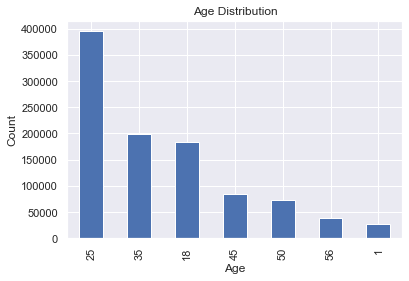

In [25]:
# Plot for users with different age groups
master_data['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("Age Distribution")
plt.ylabel('Count')
plt.show()
#most users are between age 20-30

In [22]:
master_data['Age'].value_counts()


25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

In [23]:
master_data['Age'].value_counts().nlargest(10)

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

In [30]:
# ratings for the movie toy story 2
toystory2Rating = master_data[master_data['Title'].str.contains('Toy Story 2') == True]
toystory2Rating

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
50,3114,Toy Story 2 (1999),1,1,F,10,4
203,3114,Toy Story 2 (1999),3,25,M,15,3
773,3114,Toy Story 2 (1999),9,25,M,17,4
946,3114,Toy Story 2 (1999),10,35,F,1,4
1797,3114,Toy Story 2 (1999),17,50,M,1,5
...,...,...,...,...,...,...,...
997258,3114,Toy Story 2 (1999),6022,25,M,17,5
997461,3114,Toy Story 2 (1999),6024,25,M,12,4
997898,3114,Toy Story 2 (1999),6027,18,M,4,4
998926,3114,Toy Story 2 (1999),6036,25,F,15,4


In [35]:
toystoryRating = master_data[master_data['Title'].str.contains('Toy Story') == True]
toystoryRating

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
40,1,Toy Story (1995),1,1,F,10,5
50,3114,Toy Story 2 (1999),1,1,F,10,4
203,3114,Toy Story 2 (1999),3,25,M,15,3
469,1,Toy Story (1995),6,50,F,9,4
581,1,Toy Story (1995),8,25,M,12,4
...,...,...,...,...,...,...,...
998170,1,Toy Story (1995),6032,45,M,7,4
998360,1,Toy Story (1995),6035,25,F,1,4
998926,3114,Toy Story 2 (1999),6036,25,F,15,4
999583,3114,Toy Story 2 (1999),6037,45,F,1,4


In [37]:
#Top 25 movies by viewership rating

Top25 = master_data.groupby('Title').size().sort_values(ascending=False)[:25]
Top25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

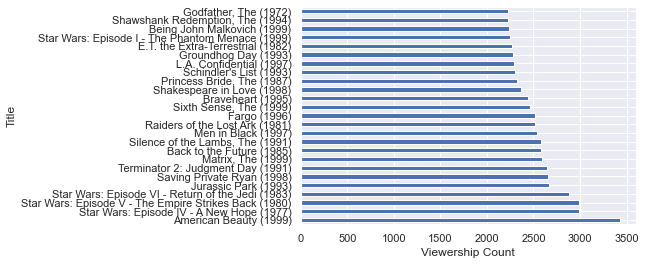

In [36]:
#Top 25 movies by viewership rating

res = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="barh")

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
440667,1258,"Shining, The (1980)",2696,25,M,7,4
440668,1270,Back to the Future (1985),2696,25,M,7,2
440669,1617,L.A. Confidential (1997),2696,25,M,7,4
440670,1625,"Game, The (1997)",2696,25,M,7,4
440671,1644,I Know What You Did Last Summer (1997),2696,25,M,7,2
440672,1645,"Devil's Advocate, The (1997)",2696,25,M,7,4
440673,1805,Wild Things (1998),2696,25,M,7,4
440674,1892,"Perfect Murder, A (1998)",2696,25,M,7,4
440675,800,Lone Star (1996),2696,25,M,7,5
440676,2338,I Still Know What You Did Last Summer (1998),2696,25,M,7,2


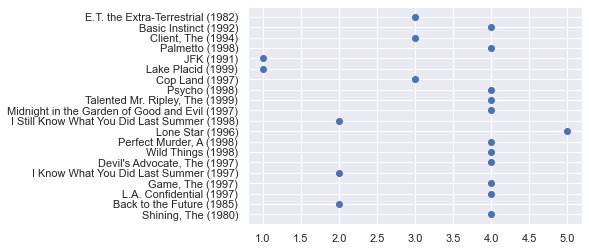

In [38]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696

res = master_data[master_data.UserID == 2696]

plt.scatter(y=res.Title, x=res.Rating)

res